In [34]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [35]:
paths=[]
labels=[]
for dirname, _,filenames in os.walk('C:\\Users\\Mi\\jupyter_lab_projs\\datasets\\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        labels.append(filename.split('_')[-1].split('.')[0].lower())

In [36]:
paths[:5]

['C:\\Users\\Mi\\jupyter_lab_projs\\datasets\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\Mi\\jupyter_lab_projs\\datasets\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\Mi\\jupyter_lab_projs\\datasets\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\Mi\\jupyter_lab_projs\\datasets\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\Mi\\jupyter_lab_projs\\datasets\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [37]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [38]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,C:\Users\Mi\jupyter_lab_projs\datasets\TESS To...,angry
1,C:\Users\Mi\jupyter_lab_projs\datasets\TESS To...,angry
2,C:\Users\Mi\jupyter_lab_projs\datasets\TESS To...,angry
3,C:\Users\Mi\jupyter_lab_projs\datasets\TESS To...,angry
4,C:\Users\Mi\jupyter_lab_projs\datasets\TESS To...,angry


In [39]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

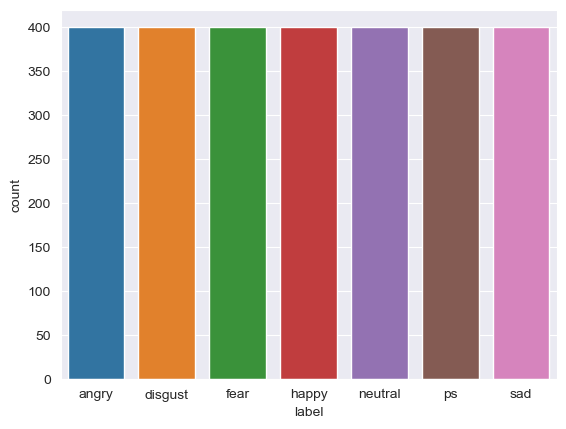

In [40]:
# plt.plot(df['label'].value_counts())
sns.countplot(x=df['label'])

In [41]:
df['label']

0       angry
1       angry
2       angry
3       angry
4       angry
        ...  
2795      sad
2796      sad
2797      sad
2798      sad
2799      sad
Name: label, Length: 2800, dtype: object

In [42]:
def waveplot(data,sr,emotion,plot_position):
    # plt.figure(figsize=(10,4))
    # plt.title(emotion,size=20)
    plot_position.set_title(emotion, fontweight='bold')
    return librosa.display.waveshow(data,sr=sr,ax=plot_position)


def spectrogram(data,sr,emotion,plot_position):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    # plt.figure(figsize=(10,4))
    # plt.title(emotion,size=20)
    plot_position.set_title(emotion, fontweight='bold')
    return librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz',ax=plot_position)


def build_multiple_plots(emotions):
    fig, ax = plt.subplots(nrows=2, ncols=len(emotions))
    audio_paths=[]
    for cnt,emotion in enumerate(emotions):
        path=df['speech'][df['label']==emotion].iloc[0]
        data, sampling_rate = librosa.load(path)
        audio_paths.append(path)
        spectrogram(data,sampling_rate,emotion,ax[1,cnt])
        waveplot(data,sampling_rate,emotion,ax[0,cnt])

    fig.set_size_inches(23,9)
    # plt.colorbar()
    plt.show()
    # Audio(filename=audio_paths)

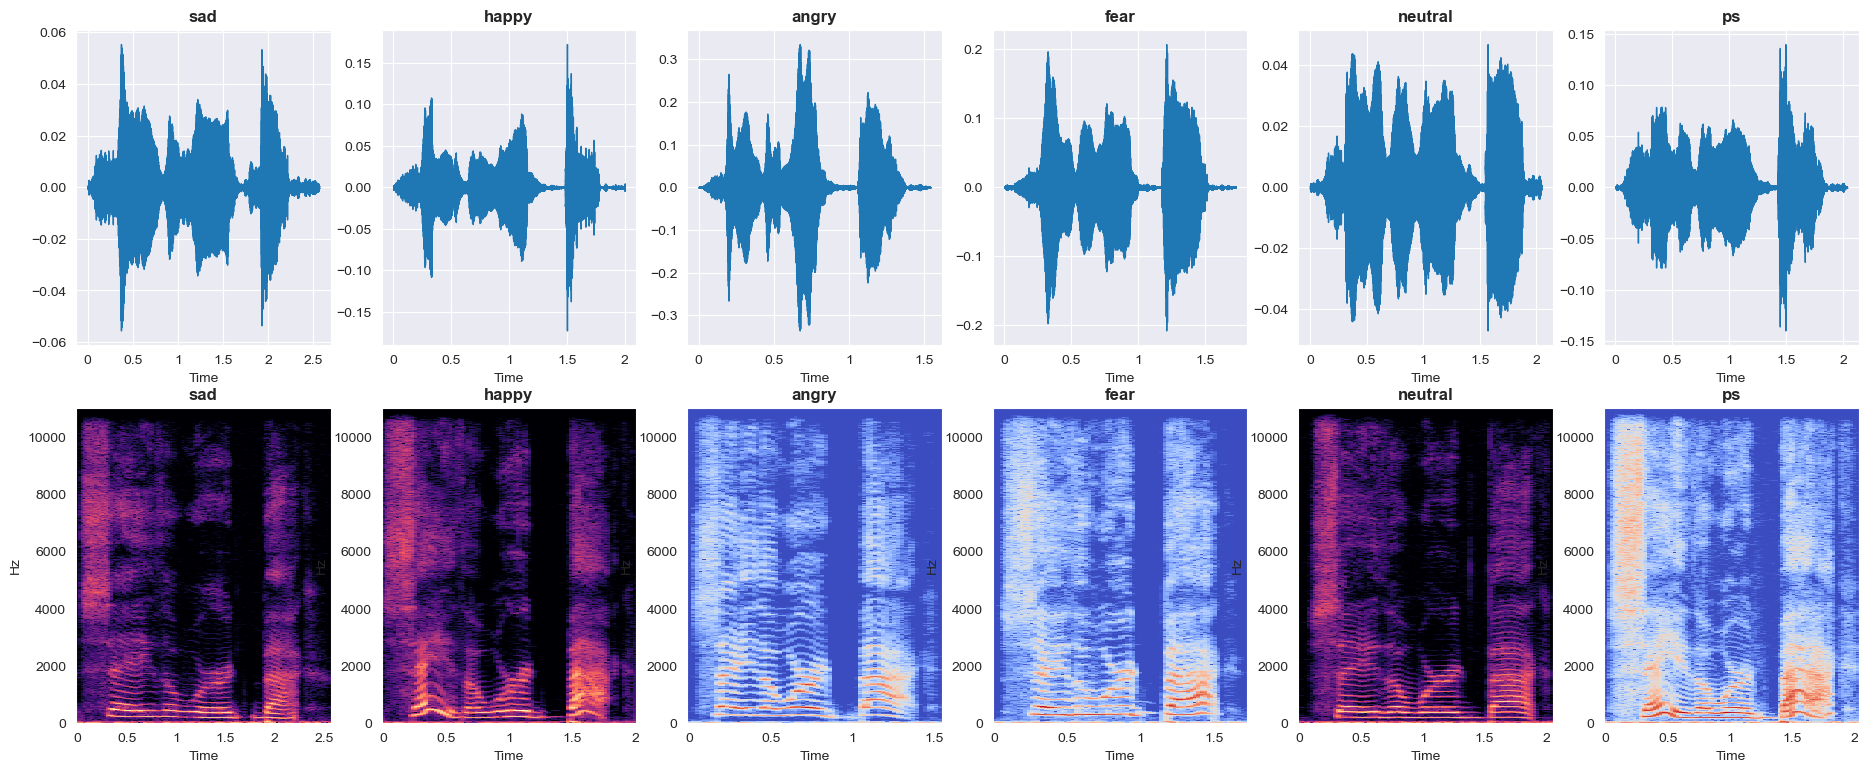

In [43]:
emotions=['sad','happy','angry','fear','neutral','ps']

build_multiple_plots(emotions)

In [44]:
path=df['speech'][df['label']=='sad']
path.iloc[0]

'C:\\Users\\Mi\\jupyter_lab_projs\\datasets\\TESS Toronto emotional speech set data\\OAF_Sad\\OAF_back_sad.wav'

In [45]:
# emotion='happy'
# path=df['speech'][df['label']==emotion].iloc[0]
# data, sampling_rate = librosa.load(path)
# spectrogram(data,sampling_rate,emotion)
# Audio(path)

In [46]:
# emotion='sad'
# path=df['speech'][df['label']==emotion].iloc[0]
# data, sampling_rate = librosa.load(path)
# waveplot(data,sampling_rate,emotion)
# spectrogram(data,sampling_rate,emotion)
# Audio(path)

# Feature Extraction

In [47]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc= np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc


In [48]:
path=df['speech'][df['label']=='sad'].iloc[0]
print(extract_mfcc(path))

[-5.57478821e+02  1.01509972e+02  2.39797535e+01  9.97821903e+00
  2.00075169e+01  1.59257879e+01 -1.00365515e+01 -8.94406605e+00
 -1.38503580e+01  3.60754728e+00 -8.60651779e+00  6.61812496e+00
 -7.68673611e+00  9.91365337e+00  5.36799479e+00 -1.90988195e+00
 -2.31344032e+00  1.08393602e-01  4.00900888e+00 -3.59593153e+00
  1.17950678e+00  1.94019294e+00 -4.73582697e+00 -1.54006049e-01
 -9.01162720e+00  3.53501022e-01 -2.30597687e+00  3.75863075e-01
 -5.47873592e+00  7.39274073e+00  2.75570726e+00  1.09718485e+01
  9.62263966e+00  1.12034121e+01  6.16445684e+00  8.37980461e+00
  8.44131851e+00  8.72378731e+00  1.46463900e+01  1.51884584e+01]


In [49]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [50]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.124, 1.5550474, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092943, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54757, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.37326, 39.57707, -2....
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [51]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [52]:
X_1=X
X_1

array([[-396.9862   ,   77.44054  ,  -19.59279  , ...,    9.313924 ,
           2.0891502,   -1.9064913],
       [-465.73267  ,   98.77373  ,    0.6560089, ...,    8.680708 ,
           4.173659 ,    3.258969 ],
       [-429.79196  ,   46.124    ,    1.5550474, ...,    8.633682 ,
          -2.4228284,   -2.3461313],
       ...,
       [-378.50494  ,   80.91062  ,   35.300533 , ...,    6.463878 ,
           4.5451474,    7.043936 ],
       [-434.8618   ,   89.906364 ,   28.37326  , ...,   10.526769 ,
          11.808918 ,   10.119673 ],
       [-421.8341   ,   70.69788  ,   32.476387 , ...,    5.080212 ,
           5.131576 ,    6.3598347]], dtype=float32)

In [53]:
X = np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [54]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [55]:
y=y.toarray()

In [56]:
y.shape

(2800, 7)

# Create  the LSTM Model

In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 123)               61500     
                                                                 
 dense_12 (Dense)            (None, 64)                7936      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

# Train the model

In [67]:
history= model.fit(X,y,validation_split=0.3,epochs=100,batch_size=190,shuffle=True)

Epoch 1/100
11/11 [==============================] - 1s 52ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.4118 - val_accuracy: 0.6338
Epoch 2/100
11/11 [==============================] - 1s 50ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.5543 - val_accuracy: 0.6314
Epoch 3/100
11/11 [==============================] - 1s 50ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.4786 - val_accuracy: 0.6730
Epoch 4/100
11/11 [==============================] - 1s 53ms/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 4.5334 - val_accuracy: 0.6171
Epoch 5/100
11/11 [==============================] - 1s 53ms/step - loss: 0.1649 - accuracy: 0.9673 - val_loss: 2.0635 - val_accuracy: 0.7348
Epoch 6/100
11/11 [==============================] - 1s 51ms/step - loss: 0.0666 - accuracy: 0.9801 - val_loss: 2.7427 - val_accuracy: 0.5826
Epoch 7/100
11/11 [==============================] - 1s 51ms/step - loss: 0.0835 - accuracy: 0.9765 - val_loss: 2.5710 - val_accuracy: 0.5589
Epoch 

# plot the results


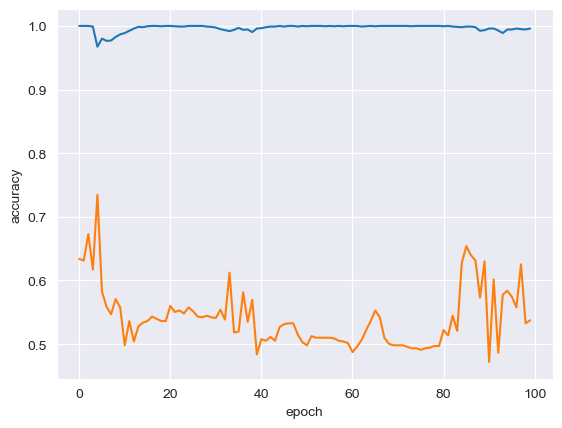

In [70]:
epoch=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epoch,acc,label='train_accuracy')
plt.plot(epoch,val_acc,label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# trying to optimize results

In [71]:
model = Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               264192    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 7)                 455       
                                                                 
Total params: 305,799
Trainable params: 305,799
Non-tr

In [74]:
history= model.fit(X,y,validation_split=0.2,epochs=500,batch_size=190,shuffle=True)

Epoch 1/500
12/12 [==============================] - 1s 123ms/step - loss: 1.5024e-04 - accuracy: 1.0000 - val_loss: 5.2379 - val_accuracy: 0.4768
Epoch 2/500
12/12 [==============================] - 1s 119ms/step - loss: 1.1726e-04 - accuracy: 1.0000 - val_loss: 5.2504 - val_accuracy: 0.4768
Epoch 3/500
12/12 [==============================] - 1s 124ms/step - loss: 1.3683e-04 - accuracy: 1.0000 - val_loss: 5.2801 - val_accuracy: 0.4732
Epoch 4/500
12/12 [==============================] - 1s 123ms/step - loss: 1.2273e-04 - accuracy: 1.0000 - val_loss: 5.2917 - val_accuracy: 0.4696
Epoch 5/500
12/12 [==============================] - 1s 122ms/step - loss: 1.4379e-04 - accuracy: 1.0000 - val_loss: 5.3319 - val_accuracy: 0.4679
Epoch 6/500
12/12 [==============================] - 1s 123ms/step - loss: 2.8201e-04 - accuracy: 1.0000 - val_loss: 5.6236 - val_accuracy: 0.4375
Epoch 7/500
12/12 [==============================] - 1s 122ms/step - loss: 1.2984e-04 - accuracy: 1.0000 - val_loss: 6

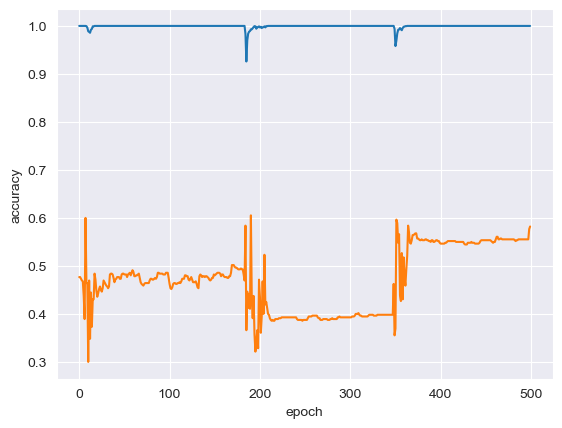

In [76]:
epoch=list(range(500))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epoch,acc,label='train_accuracy')
plt.plot(epoch,val_acc,label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

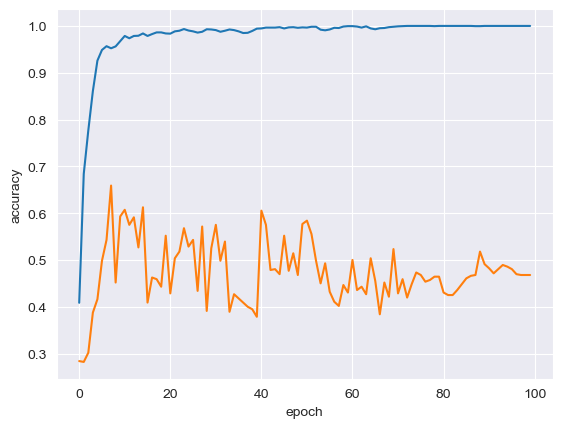

In [73]:
epoch=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epoch,acc,label='train_accuracy')
plt.plot(epoch,val_acc,label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [86]:
model = Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 7)                

In [87]:
history= model.fit(X,y,validation_split=0.1,epochs=100,batch_size=128,shuffle=True)

Epoch 1/100
20/20 [==============================] - 3s 94ms/step - loss: 1.4903 - accuracy: 0.4329 - val_loss: 1.6463 - val_accuracy: 0.0071
Epoch 2/100
20/20 [==============================] - 2s 76ms/step - loss: 0.6520 - accuracy: 0.7520 - val_loss: 0.9085 - val_accuracy: 0.6214
Epoch 3/100
20/20 [==============================] - 2s 77ms/step - loss: 0.3363 - accuracy: 0.8806 - val_loss: 0.7672 - val_accuracy: 0.6964
Epoch 4/100
20/20 [==============================] - 2s 77ms/step - loss: 0.2259 - accuracy: 0.9321 - val_loss: 0.2095 - val_accuracy: 0.9357
Epoch 5/100
20/20 [==============================] - 2s 78ms/step - loss: 0.1977 - accuracy: 0.9349 - val_loss: 1.3287 - val_accuracy: 0.4464
Epoch 6/100
20/20 [==============================] - 2s 77ms/step - loss: 0.1449 - accuracy: 0.9528 - val_loss: 0.5468 - val_accuracy: 0.8286
Epoch 7/100
20/20 [==============================] - 2s 76ms/step - loss: 0.1096 - accuracy: 0.9631 - val_loss: 0.6072 - val_accuracy: 0.8107
Epoch 

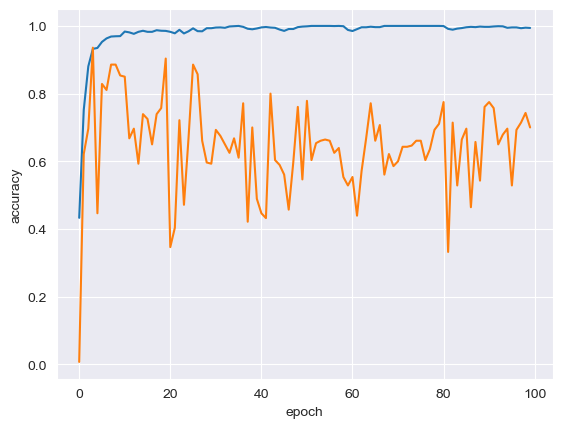

In [88]:
epoch=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epoch,acc,label='train_accuracy')
plt.plot(epoch,val_acc,label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()